# GeoPandas

`GeoPandas` is an open source project to make working with geospatial data in python easier. `GeoPandas` extends the datatypes used by `pandas` to allow spatial operations on geometric types. Geometric operations are performed by `shapely`. `Geopandas` further depends on `fiona` for file access and `descartes` and `matplotlib` for plotting… `GeoPandas` enables you to easily do operations in python that would otherwise require a spatial database such as `PostGIS`.

Required dependencies:
- `numpy`
- `pandas` (version 0.19.1 or later)
- `shapely` (interface to GEOS)
- `fiona` (interface to GDAL)
- `pyproj` (interface to PROJ)


- `rtree` (optional; spatial index to improve performance and required for overlay operations; interface to libspatialindex)
- `psycopg2` (optional; for PostGIS connection)
- `geopy` (optional; for geocoding)

For plotting, these additional packages may be used:
- `matplotlib`
- `descartes`
- `mapclassify`

### Shapely

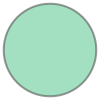

In [16]:
from shapely.geometry import Point
patch = Point(0.0, 0.0).buffer(10.0)
patch

In [17]:
patch.area

313.6548490545939

In [18]:
from shapely.wkt import dumps, loads

dumps(loads('POINT (0 0)')) #well-known text

'POINT (0.0000000000000000 0.0000000000000000)'

In [19]:
from shapely.geometry import Point, LineString, Polygon

polygon = Polygon(((-1.0, -1.0), (-1.0, 1.0), (1.0, 1.0), (1.0, -1.0)))

point_r = Point(-1.5, 1.2)
point_g = Point(-1.0, 1.0)
point_b = Point(-0.5, 0.5)

line_r = LineString(((-0.5, 0.5), (0.5, 0.5)))


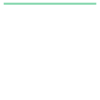

In [20]:
line_r

### Fiona

Fiona reads and writes geographic data files and thereby helps Python programmers integrate geographic information systems with other computer systems. Fiona contains extension modules that link the Geospatial Data Abstraction Library (GDAL).

### Descarets

Use Shapely or GeoJSON-like geometric objects as matplotlib paths and patches ([example](https://sgillies.net/2010/04/07/descartes.html))

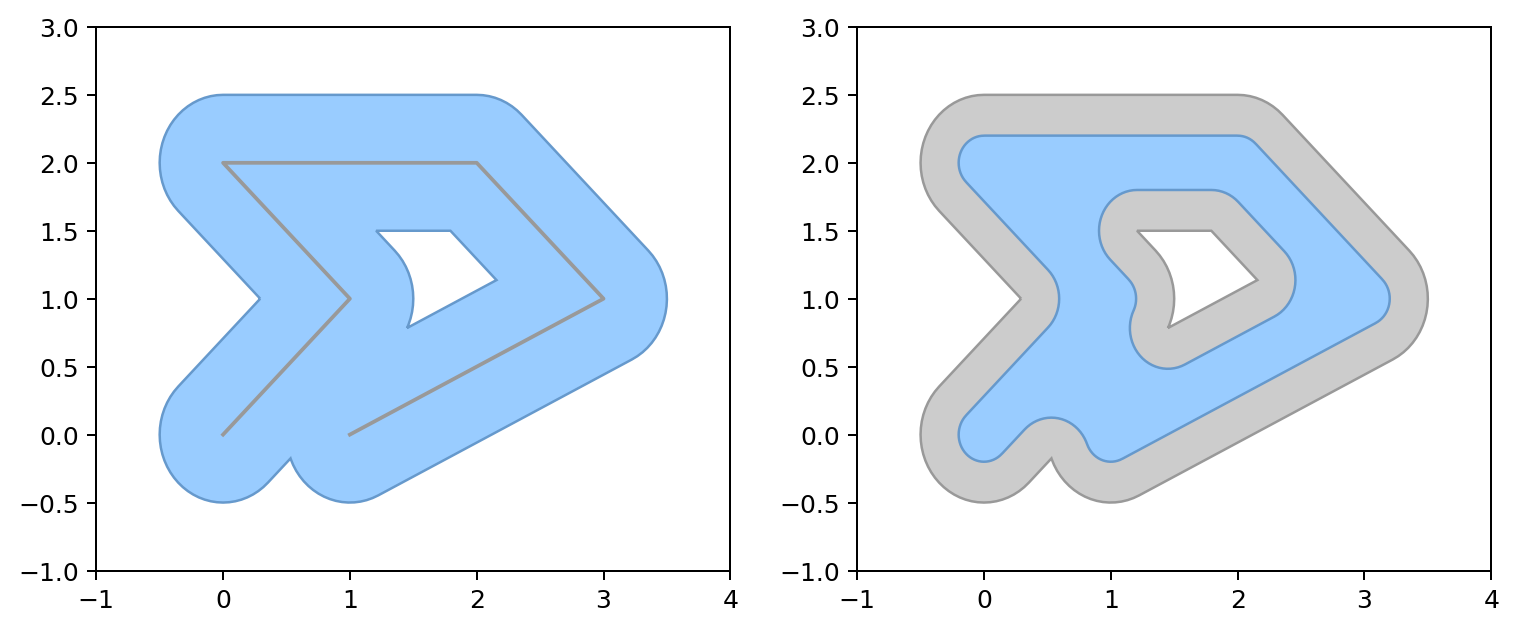

In [21]:
from matplotlib import pyplot
from shapely.geometry import LineString
from descartes import PolygonPatch

fig = pyplot.figure(1, figsize=(10, 4), dpi=180)

# Plot 1: dilating a line
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
ax = fig.add_subplot(121)
dilated = line.buffer(0.5)
patch1 = PolygonPatch(dilated, facecolor='#99ccff', edgecolor='#6699cc')
ax.add_patch(patch1)
x, y = line.xy
ax.plot(x, y, color='#999999')
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 3)

# Plot 2: eroding the polygon from 1
ax = fig.add_subplot(122)
patch2a = PolygonPatch(dilated, facecolor='#cccccc', edgecolor='#999999')
ax.add_patch(patch2a)
eroded = dilated.buffer(-0.3)
patch2b = PolygonPatch(eroded, facecolor='#99ccff', edgecolor='#6699cc')
ax.add_patch(patch2b)
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 3)

pyplot.show()

# Choropleth

In [22]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
world.head()

CRSError: Invalid projection: epsg:4326: (Internal Proj Error: proj_create: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name)

In [ ]:
world.plot( figsize=(16, 9))

In [ ]:
world.columns

In [ ]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap', figsize=(16, 9));

Adding a legend to plot

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

world.plot(column='pop_est', ax=ax, legend=True)

Controlling legend to plot

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)

world.plot(column='pop_est', ax=ax, legend=True, cax=cax)

The way color maps are scaled can also be manipulated with the `scheme` option 

In [ ]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles',legend=True, figsize=(16, 9));

# MapClassify

`mapclassify` is intended to be used with visualizaiton packages to handle the actual rendering of the choropleth maps defined on its classifiers. In this notebook, we explore some examples of how this is done. The notebook also includes an example that combines `mapclassify` with [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) to allow for the interactive exploration of the choice of:

- classification method
- number of classes
- colormap

In [ ]:
import libpysal 
import mapclassify

The example in this notebook use data on sudden death infant syndrome for counties in North Carolina which is a built-in dataset  available through `libpysal`. We use `libpysal` to obtain the path to the shapefile and then use `geopandas` to create a geodataframe from the shapefile:

In [ ]:
libpysal.examples.explain('sids2')

In [ ]:
pth = libpysal.examples.get_path('sids2.shp')
gdf = gpd.read_file(pth)

In [ ]:
gdf.head()

Once created, the geodataframe has a `plot` method that can be called to create our first choropleth map. We will specify the column to classify and plot as `SIDR79`: SIDS death rate per 1,000 births (1979-84). The classification scheme is set to  `Quantiles`, and the number of classes set to `k=10` (declies):

In [ ]:
gdf.plot(column='SIDR79', scheme='Quantiles', k=10, figsize=(16, 9))

We can peak under the hood a bit and recreate the classification object that was used in the previous choropleth:

In [ ]:
q10 = mapclassify.Quantiles(gdf.SIDR79,k=10)
q10

In [ ]:
q10

For quick, exploratory work, the classifier object has its own `plot` method that takes a geodataframe as an argument:

In [ ]:
_ = q10.plot(gdf)

Back to working directly with the dataframe, we can toggle on the `legend` (using [Qunatile method](https://pysal.org/mapclassify/generated/mapclassify.Quantiles.html))

In [ ]:
gdf.assign(cl=q10.yb)

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(16, 9))


gdf.assign(cl=q10.yb).plot(column='cl', categorical=True, \
        k=10, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

Here we see the 10 classes, but without more specific information on the legend, the user has to know that 0 is the first declile and 9 the 10th. We also do not know the values that define these classes. 

We can rectify this as follows:

In [ ]:
q10.get_legend_classes()

In [ ]:
mapping = dict([(i,s) for i,s in enumerate(q10.get_legend_classes())])
mapping

In [ ]:
mapping[0] = '[NA, 0.56]'

In [ ]:
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(16, 9))
gdf.assign(cl=q10.yb).plot(column='cl', categorical=True, \
        k=10, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True,
                          legend_kwds={'loc': 'lower right'})
ax.set_axis_off()
replace_legend_items(ax.get_legend(), mapping)
plt.show()

## Interactive Exploration of Choropleth Classification

Next, we develop a small application that relies on `mapclassify` together with [palettable](https://jiffyclub.github.io/palettable/) and [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) to explore the choice of:

- classification method
- number of classes
- colormap



In [23]:
import shapely


donut = Point(0, 0).buffer(2.0).difference(Point(0, 0).buffer(1.0))
donut.centroid.wkb

b'\x01\x01\x00\x00\x00\xab\xc8]\xcf\x91\x12z\xbc\xa9\x04~\x8d"\xf1\x9c\xbc'

In [24]:
from palettable import colorbrewer

sequential = colorbrewer.COLOR_MAPS['Sequential']
diverging = colorbrewer.COLOR_MAPS['Diverging']
qualitative = colorbrewer.COLOR_MAPS['Qualitative']

Considering diffrent map [Classifiers](https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html)

In [25]:
from ipywidgets import interact, Dropdown, RadioButtons, IntSlider, VBox, HBox, FloatSlider, Button, Label

k_classifiers = {
    'equal_interval': mapclassify.EqualInterval,
    'fisher_jenks': mapclassify.FisherJenks,
    'jenks_caspall': mapclassify.JenksCaspall,
    'jenks_caspall_forced': mapclassify.JenksCaspallForced,
    'maximum_breaks': mapclassify.MaximumBreaks,
    'natural_breaks': mapclassify.NaturalBreaks,
    'quantiles': mapclassify.Quantiles,
    }

def k_values(ctype, cmap):
    k = list(colorbrewer.COLOR_MAPS[ctype][cmap].keys())
    return list(map(int, k))
    
def update_map(method='quantiles', k=5, cmap='Blues'):
    classifier = k_classifiers[method](gdf.SIDR79, k=k)
    mapping = dict([(i,s) for i,s in enumerate(classifier.get_legend_classes())])

    f, ax = plt.subplots(1, figsize=(16, 9))
    gdf.assign(cl=classifier.yb).plot(column='cl', categorical=True, \
        k=k, cmap=cmap, linewidth=0.1, ax=ax, \
        edgecolor='grey', legend=True, \
        legend_kwds={'loc': 'lower right'})
    ax.set_axis_off()
    ax.set_title("SIDR79")
    replace_legend_items(ax.get_legend(), mapping)

    plt.show()
    


data_type = RadioButtons(options=['Sequential', 'Diverging', 'Qualitative'])

bindings = {'Sequential': range(3,9+1),
            'Diverging': range(3,11+1),
            'Qualitative': range(3,12+1)}

cmap_bindings = {'Sequential': list(sequential.keys()),
                 'Diverging': list(diverging.keys()),
                 'Qualitative': list(qualitative.keys())}

class_val = Dropdown(options=bindings[data_type.value], value=5) 
cmap_val = Dropdown(options=cmap_bindings[data_type.value])

def type_change(change):
    class_val.options = bindings[change['new']]
    cmap_val.options = cmap_bindings[change['new']]

def cmap_change(change):
    cmap=change['new']
    ctype = data_type.value
    k = k_values(ctype, cmap)
    class_val.options = k
    
data_type.observe(type_change, names=['value'])
cmap_val.observe(cmap_change, names=['value'])


from ipywidgets import Output, Tab
out = Output()
t = Tab()
t.children = [out]

# In this case, the interact function must be defined after the conditions stated above...
# therefore, the k now depends on the radio button 

with out:
    interact(update_map, method=list(k_classifiers.keys()), cmap=cmap_val, k = class_val)

display(VBox([data_type, out]))



Changing the type of colormap (sequential, diverging, qualitative) will update the options for the available color maps (`cmap`). Changing any of the values using the dropdowns will update the classification and the resulting choropleth map.

It is important to note that the example variable is best portrayed with the sequential colormaps. The other two types of colormaps are included for demonstration purposes only.